In [1]:
import sys

sys.path.append("../Lib")

from MRRecordUtil import *

In [2]:
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

font = FontProperties(fname="SimHei.ttf", size=14)
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        print(cm)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("显示百分比：")
#         np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
    else:
        cm_ = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
#         print('显示具体数字：')
#         print(cm_)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本问题，如果不加下面这行代码，则绘制的混淆矩阵上下只能显示一半，有的版本的matplotlib不需要下面的代码，分别试一下即可
#     plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontproperties=font)
    plt.xlabel('Predicted label', fontproperties=font)
    plt.show()


In [9]:
xlsx_path = r'D:\projects\NLP\MedicalRecord\FeatureExtracRegex\data\腹痛\临床特征_机器_人工.xls'
xlsx_data1 = load_sheet_arr_dict(xlsx_path, 'Sheet1')
xlsx_data2 = load_sheet_arr_dict(xlsx_path, 'Sheet2')

### 按列统计两个数据

In [11]:
stat_dict = {}
keys = [key for key in xlsx_data1[0]]
for key in keys:
    stat_dict[key] = {'p':[], 'y':[]}
    for r1, r2 in zip(xlsx_data1, xlsx_data2):
        stat_dict[key]['p'].append(float(r1[key]) if r1[key] != '' else 0)
        stat_dict[key]['y'].append(float(r2[key]) if r2[key] != '' else 0)


In [17]:
tags = ['0', '1', '2']
def plot_key_matrix(key):
    y, pred = stat_dict[key]['y'], stat_dict[key]['p']
    matrix = metrics.confusion_matrix(y, pred)
    plot_confusion_matrix(matrix, tags, False, 'Confusion matrix')
    
def show_acc(key):
    same = {0:0, 1:0, 2:0}
    tota = {0:0, 1:0, 2:0}
    y, pred = stat_dict[key]['y'], stat_dict[key]['p']
    for v1, v2 in zip(y, pred):
        tota[v1] = tota[v1] + 1
        if v1 == v2:
            same[v1] = same[v1] + 1
            
    same_all, tota_all = 0, 0
    for k in tota:
        print('%s: total: %s, same: %s, acc: %s' % (k, tota[k], same[k], same[k]/tota[k]))
        same_all = same_all + same[k]
        tota_all = tota_all + tota[k]
    print('ALL: total: %s, same: %s, acc: %s' % (tota_all, same_all, same_all/tota_all))
    
def show_1_notsame(key):
    y, pred = stat_dict[key]['y'], stat_dict[key]['p']
    for i, (v1, v2) in enumerate(zip(y, pred)):
        if v1 != v2 and (v1 == 1 or v2 == 1):
            print('%s	%s	%s	%s' % (stat_dict['医保编号']['y'][i],stat_dict['入院日期']['y'][i], v1, v2))

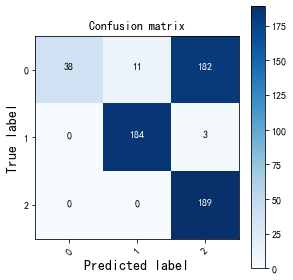

In [13]:
plot_key_matrix('腹胀')

In [18]:
show_acc('腹胀')

0: total: 231, same: 38, acc: 0.1645021645021645
1: total: 187, same: 184, acc: 0.983957219251337
2: total: 189, same: 189, acc: 1.0
ALL: total: 607, same: 411, acc: 0.6771004942339374


In [46]:
show_1_notsame('腹胀')

20078298	20220304	2	1
20084585	20220421	2	1
10269159	20220212	2	1
10307760	20220513	2	1
10308395	20220515	2	1
10311590	20220521	2	1
